## **Segmentación de clientes: Negocio de Ventas**

### Autor: Isabela Toledo Balcázar

### Marzo 2024

#### 1. Carga de datos

In [1]:
# Importar librerias necesarias
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Unión de la tabla de Clientes, tabla de Ventas y tabla de Productos
dataset_path = "Cleaned_Dataset.xlsx"

sales_df = pd.read_excel(dataset_path, sheet_name = "Sales")
customer_df = pd.read_excel(dataset_path, sheet_name = "Customer")
product_df = pd.read_excel(dataset_path, sheet_name = "Product")

#Union sales_df y customer_df
join_1_df = pd.merge(sales_df, customer_df, on = "Customer_ID", how = "left")

#Union sales_df y product_df
joined_df = pd.merge(join_1_df, product_df, on = "Product_ID", how = "left")

joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10537 entries, 0 to 10536
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Order_ID                              10537 non-null  object        
 1   Order_Date                            10537 non-null  datetime64[ns]
 2   Ship_Date                             10537 non-null  datetime64[ns]
 3   Ship_Mode                             10537 non-null  object        
 4   Customer_ID                           10537 non-null  object        
 5   Country/Region                        10537 non-null  object        
 6   City                                  10537 non-null  object        
 7   State/Province                        10537 non-null  object        
 8   Postal_Code                           10537 non-null  object        
 9   Region                                10537 non-null  object        
 10

In [3]:
joined_df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country/Region,City,State/Province,Postal_Code,Region,...,Order_year_month,Cost,Customer_Name,monthly_salary,age,marital_status [1:married/ 0:Single],credit score,Category,Sub-Category,Product_Name
0,US-2020-103800,2020-01-03,2020-01-07,Standard Class,DP-13000,United States,Houston,Texas,77095,Central,...,2020-01,10.8968,Darren Powers,9124.0,36.0,1.0,640.0,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form..."
1,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,...,2020-01,9.0270,Phillina Ober,7183.0,44.0,0.0,630.0,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs
2,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,...,2020-01,7.5123,Phillina Ober,7183.0,44.0,0.0,630.0,Office Supplies,Labels,Avery 508
3,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,...,2020-01,337.5108,Phillina Ober,7183.0,44.0,0.0,630.0,Office Supplies,Storage,SAFCO Boltless Steel Shelving
4,US-2020-141817,2020-01-05,2020-01-12,Standard Class,MB-18085,United States,Philadelphia,Pennsylvania,19143,East,...,2020-01,14.6520,Mick Brown,6388.0,27.0,1.0,730.0,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...


#### 2. Exploración inicial - Estadística descriptiva

In [4]:
# Estadísticas descriptivas para variables: Ventas, Ganancias, Salario Mensual, Estado Civil, Puntaje Crediticio
joined_df[['Sales', 'Profit', 'monthly_salary', 'age', 'marital_status [1:married/ 0:Single]', 'credit score']].describe()

,Sales,Profit,monthly_salary,age,marital_status [1:married/ 0:Single],credit score
count,1.053700e+04,10537.000000,10488.000000,10488.000000,10488.000000,10488.000000
mean,4.026086e+03,29.005067,6061.745423,38.274027,0.516495,557.584859
std,3.080534e+05,229.966878,2320.797438,7.549881,0.499752,148.594164
min,4.440000e-01,-6599.978000,2005.000000,26.000000,0.000000,300.000000
25%,1.747200e+01,1.795500,4182.000000,32.000000,0.000000,430.000000
50%,5.510400e+01,8.790600,6089.000000,38.000000,1.000000,560.000000
75%,2.105640e+02,29.952000,8091.000000,44.000000,1.000000,690.000000
max,3.000000e+07,8399.976000,10000.000000,115.000000,1.000000,800.000000


* Ventas: El promedio de ventas por transacción es de aproximadamente 4,026, pero con una desviación estándar muy alta, indicando una gran variabilidad en el valor de las ventas. 
* Ganancias: Las ganancias promedio por transacción es de 29.01, con una variabilidad también significativa. Hay transacciones con pérdidas importantes (hasta -6,599.98) y ganancias muy altas (hasta 8,399.98).
* Salario Mensual: El salario mensual promedio de los clientes es de 6,061.75, con los salarios variando entre 2,005 y 10,000.
* Edad: La edad promedio de los clientes es de 38 años.
* Estado Civil: Aproximadamente el 51.6% de los clientes están casados, indicando una distribución muy equilibrada entre clientes casados y solteros.
* Puntuación Crediticia: La puntuación de crédito promedio es de 557.58, en una escala de 300 a 800.

#### 3. Modelo RFM para la segmentación de clientes

El RFM, también conocido como análisis RFM, es un tipo de segmentación de clientes y orientación por comportamiento que se utiliza para ayudar a las empresas a clasificar y segmentar a los clientes en función de la recencia, la frecuencia y el valor monetario de una transacción.
Fuente: https://mailchimp.com/es/resources/rfm-analysis/#:~:text=El%20RFM%2C%20tambi%C3%A9n%20conocido%20como,valor%20monetario%20de%20una%20transacci%C3%B3n.

#### Cálculo de Métricas

* Recencia: La diferencia en días entre la fecha más reciente de compra y la última fecha en el conjunto de datos.
* Frecuencia: El número total de compras realizadas por el cliente.
* Valor Monetario: El valor total gastado por el cliente.

In [5]:
# Formatear columnas de fecha a datetime si es necesario
joined_df['Order_Date'] = pd.to_datetime(joined_df['Order_Date'])

# Identificar la fecha más reciente en los datos de ventas
latest_date = joined_df['Order_Date'].max()

# Calculo de metricas RFM 
# Agrupar por Customer_Name para calcular Recency, Frequency y Monetary
rfm_df = joined_df.groupby('Customer_Name').agg({
    'Order_Date': lambda x: (latest_date - x.max()).days,  # Recency
    'Order_ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary
}).rename(columns={'Order_Date': 'Recency', 'Order_ID': 'Frequency', 'Sales': 'Monetary'})

rfm_df.head()

,Recency,Frequency,Monetary
Customer_Name,,,
Aaron Bergman,415,6,886.156
Aaron Hawkins,12,11,1744.700
Aaron Smayling,88,10,3050.692
Adam Bellavance,54,21,7957.180
Adam Hart,34,20,3250.337


### Segmentación de los clientes

Para segmentar a los clientes utilizando el modelo RFM, una técnica común es utilizar los cuartiles para asignar una puntuación de 1 a 4 a cada una de las métricas, donde:

* Para Recency, 1 representa a los clientes más recientes y 4 a los menos recientes.
* Para Frequency y Monetary, 1 representa a los clientes con los valores más bajos y 4 a los más altos.

Luego, se combinan estas puntuaciones para crear segmentos de clientes, como "Clientes más valiosos", "Clientes leales", "Clientes Potenciales", "Clientes en Riesgo" y "Clientes no recurrentes".

In [6]:
# Calculo de cuartiles
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Funciones para asignar puntuaciones R, F, M
def r_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def fm_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Asignamos puntuaciones al dataframe
rfm_df['R_Score'] = rfm_df['Recency'].apply(r_score, args=('Recency', quantiles,))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(fm_score, args=('Frequency', quantiles,))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(fm_score, args=('Monetary', quantiles,))

# Calcular RFM Score sumando los valores R, F, M
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer_Name,,,,,,,
Aaron Bergman,415,6,886.156,1,1,1,111
Aaron Hawkins,12,11,1744.700,4,2,2,422
Aaron Smayling,88,10,3050.692,2,2,3,223
Adam Bellavance,54,21,7957.180,3,4,4,344
Adam Hart,34,20,3250.337,3,4,3,343


In [7]:
# Definimos una función para asignar los segmentos basados en los valores RFM
def assign_segment(row):
    if row['RFM_Score'] in ['444', '443']:
        return 'VIP'
    elif row['F_Score'] == 4:
        return 'Leal'
    elif row['R_Score'] in [4, 3] and row['F_Score'] in [2, 3]:
        return 'Potencial'
    elif row['R_Score'] in [1, 2] and row['F_Score'] == 4:
        return 'En Riesgo'
    else:
        return 'No Recurrente'

# Aplicamos la función para asignar segmentos
rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)
rfm_df.head(10)


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
Customer_Name,,,,,,,,
Aaron Bergman,415,6,886.156,1,1,1,111,No Recurrente
Aaron Hawkins,12,11,1744.700,4,2,2,422,Potencial
Aaron Smayling,88,10,3050.692,2,2,3,223,No Recurrente
Adam Bellavance,54,21,7957.180,3,4,4,344,Leal
Adam Hart,34,20,3250.337,3,4,3,343,Leal
Adam Shillingsburg,28,25,3255.310,4,4,3,443,VIP
Adrian Barton,41,21,14818.275,3,4,4,344,Leal
Adrian Hane,60,17,1899.474,3,3,2,332,Potencial
Adrian Shami,41,4,63.000,3,1,1,311,No Recurrente


Definición de segmentos:

* Clientes VIP (Valiosos): RFM Score de "444" o "443", indica que son clientes recientes, frecuentes y con alto gasto.
* Clientes Leales: Alta puntuación en Frecuencia, como "X4X".
* Clientes Potenciales: Clientes con buenos valores de Recencia y Frequencia, pero no necesariamente altos en Valor monetario.
* Clientes en Riesgo: Bajos en Recencia pero altos en Frequencia y Valor monetario.
* Clientes No Recurrentes: Bajos en Frequencia y posiblemente variados en Recencia y Valor Monetario.

In [8]:
# Distribución de segmentos
segment_distribution = rfm_df['Segment'].value_counts()
segment_distribution

Segment
No Recurrente    401
Potencial        210
Leal             131
VIP               53
Name: count, dtype: int64

Tenemos: 401 clientes "No recurrentes", 210 "clientes potenciales", 131 clientes "leales" y 53 clientes "VIP"

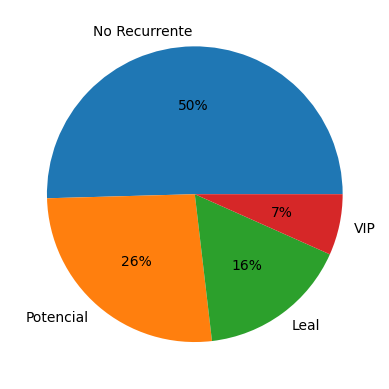

In [9]:
plt.pie(rfm_df['Segment'].value_counts(),
		labels = rfm_df['Segment'].value_counts().index,
		autopct='%.0f%%')
plt.show()


In [10]:
# Calculo de estadísticas clave de RFM para cada segmento
rfm_stats = rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum']
}).round(2)

rfm_stats

Recency Frequency   Monetary             
                 mean      mean       mean          sum
Segment                                                
Leal           122.70     22.84    5260.43    689116.45
No Recurrente  230.21      8.92   26950.92  10807319.57
Potencial       31.25     12.80  145988.37  30657558.46
VIP             16.68     23.25    4874.57    258351.96

### Análisis con variables demográficas

In [11]:
# Union de la información demográfica para explorar las diferencias entre los segmentos
rfm_demographics_df = rfm_df.merge(customer_df, on='Customer_Name', how='left')

# Calculo de estadísticas demográficas para cada segmento
demographics_stats = rfm_demographics_df.groupby('Segment').agg({
    'age': 'mean',
    'monthly_salary': 'mean',
    'marital_status [1:married/ 0:Single]': 'mean',
    'credit score': 'mean'
}).round(2)

demographics_stats



,age,monthly_salary,marital_status [1:married/ 0:Single],credit score
Segment,,,,
Leal,38.81,6132.89,0.55,549.39
No Recurrente,37.79,5965.76,0.52,553.39
Potencial,38.09,6073.03,0.51,564.86
VIP,38.79,6100.66,0.45,579.43


* Edad: La edad promedio en los segmentos es bastante uniforme alrededor de los 38 años. 
* Salario Mensual: Los clientes leales y los VIP tienen los ingresos mensuales promedio más altos, lo que puede correlacionarse con su capacidad para realizar compras más frecuentes o más costosas.
* Estado Civil: La proporción de clientes casados en comparación con los solteros varía ligeramente, siendo más baja en el segmento VIP. Sugiriendo una posible libertad financiera mayor para los clientes solteros.
* Puntaje de Crédito: Los VIP tienen el puntaje de crédito promedio más alto,  Lo que puede sugerir una mejor salud financiera, y los clientes No Recurrentes tienen un puntaje de crédito ligeramente inferior al de otros segmentos.

In [12]:
# Exportamos el RFM dataframe a excel
rfm_df.reset_index(inplace=True)

with pd.ExcelWriter("RFM_Segmentation.xlsx", engine='xlsxwriter') as writer:
    rfm_df.to_excel(writer, sheet_name = 'Customer_segmentation', index = False)